In [1]:
import pandas as pd
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import cartopy as cr
import cartopy.feature as cf
import cartopy.crs as ccrs

c:\Users\Akshit Nanda\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
c:\Users\Akshit Nanda\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\Akshit Nanda\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\Users\Akshit Nanda\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], metho

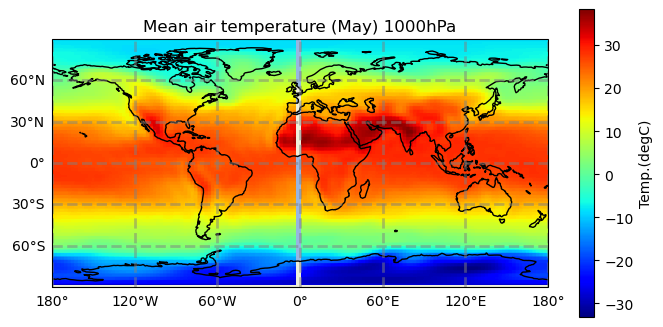

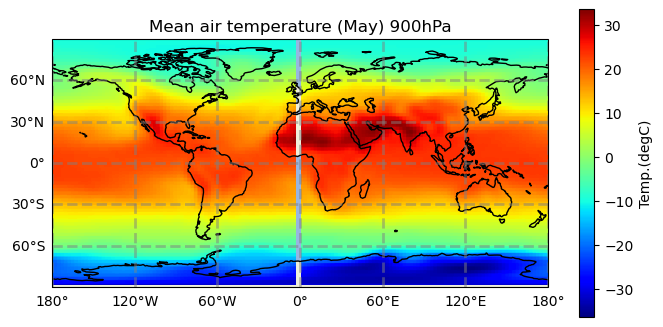

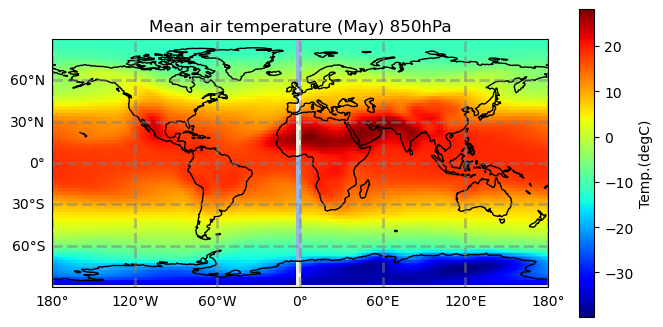

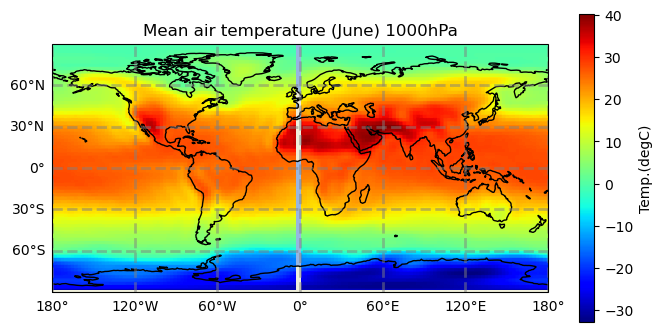

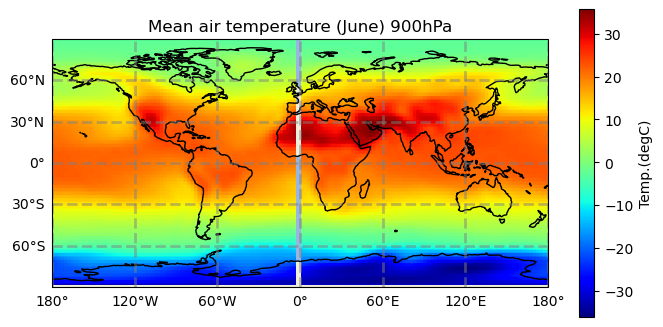

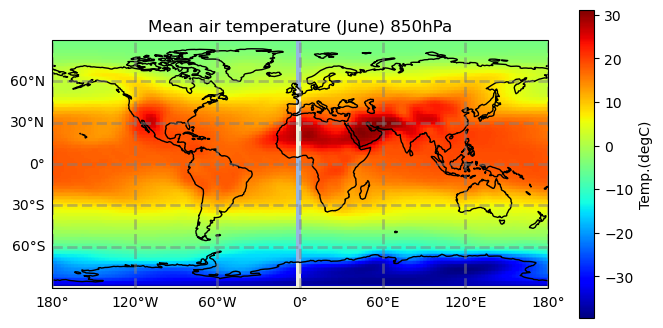

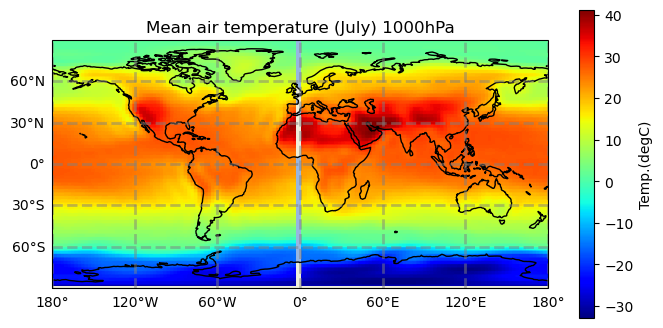

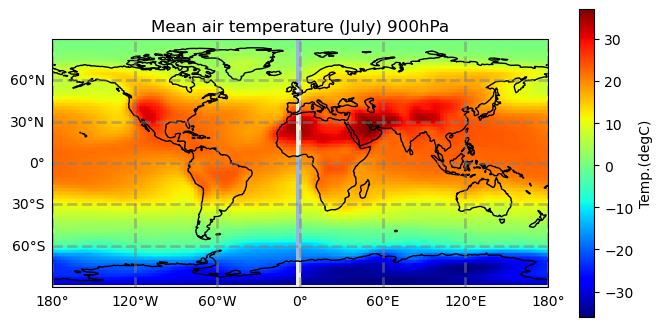

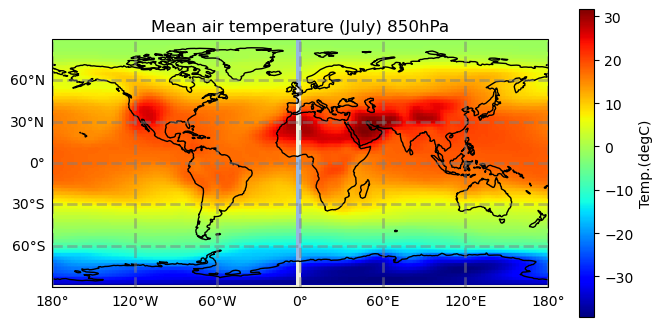

In [3]:
month = ['may','june','july']
pressure = ['1000','900','850']

for i in month:
    for j in pressure:
        clim_month = xr.open_dataset('./air.'+i+'.nc')
        clim_month = clim_month.mean(dim='time')
        clim_month = clim_month.sel(level=j,method='nearest')
        clim_month = clim_month['air']

        lat = clim_month.lat; lon = clim_month.lon
        fig = plt.figure(figsize=(8,5))
        ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))
        mp = ax.imshow(clim_month - 273,extent=(lon.min(),lon.max(),lat.min(),lat.max()),cmap='jet',origin='upper')

        ax.add_feature(cf.LAND)
        ax.add_feature(cf.COASTLINE)
        ax.add_feature(cf.OCEAN)

        cbar = fig.colorbar(mp, shrink=0.8,label='Temp.(degC)')

        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
        gl.xlabels_top = False
        gl.ylabels_right = False
        plt.title('Mean air temperature ('+i.capitalize()+')' + ' ' + j + 'hPa')
        plt.savefig('../summer monsoon/task4_plots/Mean air temperature ('+i.capitalize()+')' + ' ' + j + 'hPa')